In [1]:
#Author: Joshua Goldberg


#Data: Analyzing data from the Bureau of Transportation Statistics (BTS) 
#Mission: I am investigating Departure Delay times from two New York
#Airports (LGA and JFK)

#Data Selection: As the BTS database for Reporting Carrier On-Time 
#Performance contains data on 105+ variables for each year since 1987, 
#I selected a list of 25 variables to evaluate in greater detail below,
#looking at a random Month/Year combination: March, 2019

#Question: Is the Average Departure Delay greater at LGA or JFK?
#Hypothesis: Specifically, I hypothesize that the average Departure  
#Delay for LGA is greater than the comparable metric total for JFK


In [2]:

#Variables Selected for Download from BTS Website:

#Year
#Quarter
#Month
#DayofMonth
#DayofWeek
#Reporting_Airline
#Tail_Number
#Flight_Number_Reporting_Airline
#OriginAirportID
#Origin
#DestAirportID
#Dest
#CrsDepTime
#DepTime
#DepDelay
#DepDel15
#CrsArrTime
#Arrtime
#ArrDelay
#ArrDel15
#Cancelled
#Diverted
#CRSElapsedTime
#ActualElapsedTime
#Distance

#Filters on above fields:
#Geography: All
#Year: 2019
#Month: March

In [4]:

#Load in initial packages
import os  

#Rename the Flight Predictions File (March, 2019 Data)
#os.rename('905069506_T_ONTIME_REPORTING.csv','Flight_Delays.csv') 

In [5]:

#Import the libraries for the analysis
import pandas as pd

#Read in the data file as a Pandas data frame
df = pd.read_csv('Flight_Delays.csv')

#Look at first several rows of data set
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2019,1,3,21,4,9E,N8943A,3497,15412,TYS,...,1859,1844.0,-15.0,0.0,0.0,0.0,104.0,100.0,443.0,NaN
1,2019,1,3,22,5,9E,N8688C,3497,15412,TYS,...,1859,1850.0,-9.0,0.0,0.0,0.0,104.0,99.0,443.0,NaN
2,2019,1,3,23,6,9E,N840AY,3497,15412,TYS,...,1857,1834.0,-23.0,0.0,0.0,0.0,102.0,91.0,443.0,NaN
3,2019,1,3,17,7,9E,N279PQ,5271,12478,JFK,...,2304,2245.0,-19.0,0.0,0.0,0.0,99.0,81.0,301.0,NaN
4,2019,1,3,18,1,9E,N906XJ,5271,12478,JFK,...,2304,2243.0,-21.0,0.0,0.0,0.0,99.0,84.0,301.0,NaN


In [6]:

#View data shape (rows and columns) as well as columnar summary metrics
df.shape
df.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,632074.0,632074.0,632074.0,632074.000000,632074.000000,632074.000000,632074.000000,632074.000000,632074.000000,619750.000000,...,632074.000000,619289.000000,618505.000000,618505.000000,632074.000000,632074.000000,632074.000000,618505.000000,632074.000000,0.0
mean,2019.0,1.0,3.0,16.074200,4.136856,2560.039698,12656.671084,12656.690313,1331.790363,1337.984673,...,1488.495777,1473.657070,3.288832,0.171829,0.019877,0.001590,143.308440,137.588820,807.299655,NaN
std,0.0,0.0,0.0,8.881371,2.005143,1803.533430,1522.747221,1522.738094,494.819656,505.816480,...,524.930152,538.989807,46.931822,0.377232,0.139579,0.039843,72.855655,72.942166,589.144283,NaN
min,2019.0,1.0,3.0,1.000000,1.000000,1.000000,10135.000000,10135.000000,1.000000,1.000000,...,1.000000,1.000000,-87.000000,0.000000,0.000000,0.000000,20.000000,16.000000,31.000000,NaN
25%,2019.0,1.0,3.0,8.000000,2.000000,1027.000000,11292.000000,11292.000000,910.000000,916.000000,...,1100.000000,1052.000000,-15.000000,0.000000,0.000000,0.000000,90.000000,85.000000,371.000000,NaN
50%,2019.0,1.0,3.0,16.000000,4.000000,2176.000000,12889.000000,12889.000000,1325.000000,1332.000000,...,1517.000000,1511.000000,-7.000000,0.000000,0.000000,0.000000,125.000000,120.000000,648.000000,NaN
75%,2019.0,1.0,3.0,24.000000,6.000000,3921.000000,14027.000000,14027.000000,1740.000000,1748.000000,...,1924.000000,1921.000000,6.000000,0.000000,0.000000,0.000000,175.000000,168.000000,1050.000000,NaN
max,2019.0,1.0,3.0,31.000000,7.000000,7439.000000,16218.000000,16218.000000,2359.000000,2400.000000,...,2400.000000,2400.000000,1928.000000,1.000000,1.000000,1.000000,690.000000,1604.000000,4983.000000,NaN


In [7]:

#Next, clean the data
#First, check for missing values, which can impact the accuracy of 
#the analysis
df.isnull().values.any() #There are missing values
df.isnull().values.sum() #There are 726,608 missing values

#Look at missing values by column
df.isnull().sum() #The last column 'Unnamed: 25' appears to have
#the majority of missing values

#Non-null values in last column
df['Unnamed: 25'] #This column isn't part of the flight data, it's 
#due to the csv upload and can be removed

#Remove last column
df = df.drop('Unnamed: 25', axis=1)

In [8]:

#Verify removal of the last column
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,2019,1,3,21,4,9E,N8943A,3497,15412,TYS,...,0.0,1859,1844.0,-15.0,0.0,0.0,0.0,104.0,100.0,443.0
1,2019,1,3,22,5,9E,N8688C,3497,15412,TYS,...,0.0,1859,1850.0,-9.0,0.0,0.0,0.0,104.0,99.0,443.0
2,2019,1,3,23,6,9E,N840AY,3497,15412,TYS,...,0.0,1857,1834.0,-23.0,0.0,0.0,0.0,102.0,91.0,443.0
3,2019,1,3,17,7,9E,N279PQ,5271,12478,JFK,...,0.0,2304,2245.0,-19.0,0.0,0.0,0.0,99.0,81.0,301.0
4,2019,1,3,18,1,9E,N906XJ,5271,12478,JFK,...,0.0,2304,2243.0,-21.0,0.0,0.0,0.0,99.0,84.0,301.0


In [9]:

#View new data set missing values - with the Unnamed column removed
df.isnull().sum() #Additional columns still are missing values

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
OP_UNIQUE_CARRIER          0
TAIL_NUM                4068
OP_CARRIER_FL_NUM          0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME               12324
DEP_DELAY              12325
DEP_DEL15              12325
CRS_ARR_TIME               0
ARR_TIME               12785
ARR_DELAY              13569
ARR_DEL15              13569
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME    13569
DISTANCE                   0
dtype: int64

In [10]:

#Select columns of interest for analysis
df = df[["YEAR", "MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", 
         "CANCELLED", "DIVERTED","DEP_DELAY"]]
df.head(20)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CANCELLED,DIVERTED,DEP_DELAY
0,2019,3,21,4,TYS,DTW,0.0,0.0,-11.0
1,2019,3,22,5,TYS,DTW,0.0,0.0,-4.0
2,2019,3,23,6,TYS,DTW,0.0,0.0,-12.0
3,2019,3,17,7,JFK,BUF,0.0,0.0,-1.0
4,2019,3,18,1,JFK,BUF,0.0,0.0,-6.0
5,2019,3,19,2,JFK,BUF,0.0,0.0,-4.0
6,2019,3,20,3,JFK,BUF,0.0,0.0,-4.0
7,2019,3,21,4,JFK,BUF,0.0,0.0,55.0
8,2019,3,22,5,JFK,BUF,0.0,0.0,32.0
9,2019,3,24,7,JFK,BUF,0.0,0.0,-6.0


In [11]:

#Check for Null values by column again - for columns of interest
df.isnull().sum() #DEP_DELAY has many null values

YEAR                0
MONTH               0
DAY_OF_MONTH        0
DAY_OF_WEEK         0
ORIGIN              0
DEST                0
CANCELLED           0
DIVERTED            0
DEP_DELAY       12325
dtype: int64

In [12]:

#Show first five rows with missing values for DEP_DELAY
df[df.DEP_DELAY.isnull()].head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CANCELLED,DIVERTED,DEP_DELAY
54,2019,3,4,1,BOS,JFK,1.0,0.0,NaN
179,2019,3,4,1,JAX,BOS,1.0,0.0,NaN
296,2019,3,3,7,CLT,LGA,1.0,0.0,NaN
728,2019,3,16,6,LGA,PIT,1.0,0.0,NaN
799,2019,3,4,1,LGA,CLT,1.0,0.0,NaN


In [13]:

#Trim and view the data set for only LGA and JFK departures
df_LGA_JFK = df[(df.ORIGIN == 'JFK') | (df.ORIGIN == 'LGA')]
df_LGA_JFK.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CANCELLED,DIVERTED,DEP_DELAY
3,2019,3,17,7,JFK,BUF,0.0,0.0,-1.0
4,2019,3,18,1,JFK,BUF,0.0,0.0,-6.0
5,2019,3,19,2,JFK,BUF,0.0,0.0,-4.0
6,2019,3,20,3,JFK,BUF,0.0,0.0,-4.0
7,2019,3,21,4,JFK,BUF,0.0,0.0,55.0


In [14]:

#View data shape (rows and columns) for only LGA and JFK departures
df_LGA_JFK.shape #The data set just shrunk from 632,074 to 26,0002
#(4% of total)

(26002, 9)

In [15]:

#View data shape (rows and columns) for only LGA and JFK departures
df_LGA_JFK.describe()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CANCELLED,DIVERTED,DEP_DELAY
count,26002.0,26002.0,26002.000000,26002.000000,26002.000000,26002.000000,25570.000000
mean,2019.0,3.0,15.946350,4.053804,0.016999,0.001077,9.954282
std,0.0,0.0,8.858381,1.998516,0.129269,0.032798,49.022297
min,2019.0,3.0,1.000000,1.000000,0.000000,0.000000,-23.000000
25%,2019.0,3.0,8.000000,2.000000,0.000000,0.000000,-6.000000
50%,2019.0,3.0,16.000000,4.000000,0.000000,0.000000,-3.000000
75%,2019.0,3.0,24.000000,6.000000,0.000000,0.000000,4.000000
max,2019.0,3.0,31.000000,7.000000,1.000000,1.000000,1321.000000


In [16]:

#Verify that the data set is only LGA and JFK
Unique_Airports = df_LGA_JFK.ORIGIN.drop_duplicates()
print (Unique_Airports)

3      JFK
210    LGA
Name: ORIGIN, dtype: object


In [17]:

#Now, check again for Null values by column, with 
#respect to the columns of interest
df_LGA_JFK.isnull().sum() #DEP_DELAY has 432 values

YEAR              0
MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CANCELLED         0
DIVERTED          0
DEP_DELAY       432
dtype: int64

In [18]:

#View data set
df_LGA_JFK.head(20)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CANCELLED,DIVERTED,DEP_DELAY
3,2019,3,17,7,JFK,BUF,0.0,0.0,-1.0
4,2019,3,18,1,JFK,BUF,0.0,0.0,-6.0
5,2019,3,19,2,JFK,BUF,0.0,0.0,-4.0
6,2019,3,20,3,JFK,BUF,0.0,0.0,-4.0
7,2019,3,21,4,JFK,BUF,0.0,0.0,55.0
8,2019,3,22,5,JFK,BUF,0.0,0.0,32.0
9,2019,3,24,7,JFK,BUF,0.0,0.0,-6.0
10,2019,3,25,1,JFK,BUF,0.0,0.0,-6.0
11,2019,3,26,2,JFK,BUF,0.0,0.0,-5.0
12,2019,3,27,3,JFK,BUF,0.0,0.0,-2.0


In [19]:

#For this analysis, I'm removing the 432 rows which have no 
#DEP_DELAY, to not impact overall totals
#Could also use mean imputation or additional techinques 
#to impute values for these 432 entries

#These are the rows I'll be omitting
NULL_DEP_DELAYS = df_LGA_JFK[df_LGA_JFK.DEP_DELAY.isnull()]
NULL_DEP_DELAYS


,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CANCELLED,DIVERTED,DEP_DELAY
728,2019,3,16,6,LGA,PIT,1.0,0.0,NaN
799,2019,3,4,1,LGA,CLT,1.0,0.0,NaN
1891,2019,3,3,7,LGA,CAE,1.0,0.0,NaN
2476,2019,3,4,1,LGA,ORF,1.0,0.0,NaN
2793,2019,3,3,7,JFK,JAX,1.0,0.0,NaN
3066,2019,3,3,7,LGA,CHO,1.0,0.0,NaN
3635,2019,3,3,7,LGA,CHA,1.0,0.0,NaN
3821,2019,3,4,1,LGA,CLT,1.0,0.0,NaN
4225,2019,3,3,7,LGA,BGR,1.0,0.0,NaN
4298,2019,3,3,7,JFK,CLE,1.0,0.0,NaN


In [20]:

#Here are the rows to include
DEP_DELAYS_INCLUDE = df_LGA_JFK[df_LGA_JFK.DEP_DELAY.notnull()]
DEP_DELAYS_INCLUDE

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CANCELLED,DIVERTED,DEP_DELAY
3,2019,3,17,7,JFK,BUF,0.0,0.0,-1.0
4,2019,3,18,1,JFK,BUF,0.0,0.0,-6.0
5,2019,3,19,2,JFK,BUF,0.0,0.0,-4.0
6,2019,3,20,3,JFK,BUF,0.0,0.0,-4.0
7,2019,3,21,4,JFK,BUF,0.0,0.0,55.0
8,2019,3,22,5,JFK,BUF,0.0,0.0,32.0
9,2019,3,24,7,JFK,BUF,0.0,0.0,-6.0
10,2019,3,25,1,JFK,BUF,0.0,0.0,-6.0
11,2019,3,26,2,JFK,BUF,0.0,0.0,-5.0
12,2019,3,27,3,JFK,BUF,0.0,0.0,-2.0


In [21]:

#Verify there are no null DEP_DELAYS
df_clean = DEP_DELAYS_INCLUDE[DEP_DELAYS_INCLUDE.DEP_DELAY.isnull()]
df_clean.shape
#Great, there are no NULL entries

(0, 9)

In [22]:
#Verify the empty set based on statistics
df_clean.describe()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CANCELLED,DIVERTED,DEP_DELAY
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:

#Find the mean delay times for each airport
Rank_Dep_Delay = DEP_DELAYS_INCLUDE.groupby('ORIGIN')['DEP_DELAY'].mean().sort_values(ascending = False).round(decimals=2)

#The above line is:
#Rank_Dep_Delay = DEP_DELAYS_INCLUDE.groupby('ORIGIN')['DEP_DELAY'].
#mean().sort_values(ascending = False).round(decimals=2)

Rank_Dep_Delay
#On average, there is a longer departure delay at LGA (in March, 2019)!
#LGA's Average Departure delay time was almost 3 minutes greater than 
#was the total for JFK, which is pretty remarkable of a difference 
#considering the impact of three extra minutes on a massive scale

ORIGIN
LGA    11.15
JFK     8.40
Name: DEP_DELAY, dtype: float64

In [24]:

#Find the mean delay times for each airport on each weekday
Daily_Delays = DEP_DELAYS_INCLUDE.groupby(["ORIGIN", "DAY_OF_WEEK"], as_index=False)["DEP_DELAY"].mean().round(decimals=2)

#The above line is:
#Daily_Delays = DEP_DELAYS_INCLUDE.groupby(["ORIGIN", "DAY_OF_WEEK"],
#as_index=False)["DEP_DELAY"].mean().round(decimals=2)


Daily_Delays = Daily_Delays.rename(columns={'DEP_DELAY':'AVG_DEP_DELAY_MINS'})
Daily_Delays = Daily_Delays.sort_values(["DAY_OF_WEEK", "AVG_DEP_DELAY_MINS"], ascending = (True, False))

#The above line is:
#Daily_Delays = Daily_Delays.sort_values(["DAY_OF_WEEK", "AVG_DEP_DELAY_MINS"],
#ascending = (True, False))


Daily_Delays
#LGA had higher Average Departure delays on 3 days of the week 
#in March, 2019 (Thursday, Friday, Saturday) 
#However, on Fridays, LGA's Average Departure Delay of 32.47 minutes 
#- by far the largest average delay for any 
#particular day was nearly double JFK's Friday total


,ORIGIN,DAY_OF_WEEK,AVG_DEP_DELAY_MINS
0,JFK,1,8.01
7,LGA,1,6.04
1,JFK,2,2.40
8,LGA,2,2.39
2,JFK,3,3.67
9,LGA,3,1.91
10,LGA,4,10.75
3,JFK,4,6.78
11,LGA,5,32.47
4,JFK,5,16.25


In the scatterplot below, note that JFK's value for Tuesday does not appear since it is essentially covered by LGA's value for Tuesday


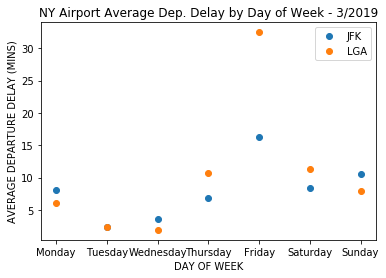

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
#import numpy as np

groups = Daily_Delays.groupby("ORIGIN")
for name, group in groups:
    plt.plot(group["DAY_OF_WEEK"], group["AVG_DEP_DELAY_MINS"], marker="o", linestyle="", label=name)
    
#The above line is:
#plt.plot(group["DAY_OF_WEEK"], group["AVG_DEP_DELAY_MINS"],
#marker="o", linestyle="", label=name)
    
plt.legend();
plt.xlabel("DAY OF WEEK");
plt.ylabel("AVERAGE DEPARTURE DELAY (MINS)");
plt.title("NY Airport Average Dep. Delay by Day of Week - 3/2019")
print("In the scatterplot below, note that JFK's value for Tuesday does not appear since it is essentially covered by LGA's value for Tuesday")

#The above line is:
#print("In the scatterplot below, note that JFK's value for Tuesday does
#not appear since it is essentially covered by LGA's value for Tuesday")

positions = (1, 2, 3, 4, 5, 6, 7)
labels = ("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")

#The above line is:
#labels = ("Monday", "Tuesday", "Wednesday", "Thursday",
#"Friday", "Saturday", "Sunday")

plt.xticks(positions, labels);
